1.	Consider PlayTennis Dataset (see attached csv file) that is used for predicting whether a tennis game is played in the given weather conditions or not. Here the weather conditions are described by features outlook, temperature, humidity, play and wind. The target is play with two class labels Yes and No. 

i.	Compute information gain for all the attributes and display them.


ii.	Find which attribute will become the root node of the decision tree.

In [5]:
import pandas as pd
import math

# Load the PlayTennis dataset
df = pd.read_csv('play (1).csv')

# Define a function to calculate entropy
def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    entropy_val = 0
    for i in range(len(elements)):
        prob = counts[i]/np.sum(counts)
        entropy_val += -prob * math.log2(prob)
    return entropy_val

# Define a function to calculate information gain
def info_gain(data, split_attribute_name, target_name="play"):
    # Calculate the total entropy
    total_entropy = entropy(data[target_name])
    
    # Calculate the weighted entropy of the subgroups after splitting on the chosen attribute
    vals, counts = np.unique(data[split_attribute_name], return_counts=True)
    weighted_entropy = 0
    for i in range(len(vals)):
        prob = counts[i] / np.sum(counts)
        subset = data[data[split_attribute_name] == vals[i]]
        subset_entropy = entropy(subset[target_name])
        weighted_entropy += prob * subset_entropy
    
    # Calculate the information gain
    info_gain = total_entropy - weighted_entropy
    return info_gain

# Find the information gain for each feature and choose the one with the highest value as the root node
features = df.columns[:-1]
target = df.columns[-1]
root_node = None
max_info_gain = 0
for feature in features:
    cur_info_gain = info_gain(df, feature, target)
    if cur_info_gain > max_info_gain:
        max_info_gain = cur_info_gain
        root_node = feature

print("The root node of the decision tree is:", root_node)

The root node of the decision tree is: day


iii.	Scikit DecisionTreeClassifier

              •	Train using DecisionTreeClassifier using tennis dataset;

              •	Classify the test sample  <Rain, Cool, High,Weak>. 

              •	Draw the decision tree for a max depth 2
                         graph = Source( tree.export_graphviz(id3_model, out_file = None))
                        SVG(graph.pipe(format='svg'))


       Check whether root node that you identified is same as the one returned by Scikit DecisionTreeClassifier.

In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# load the dataset
tennis_data = pd.read_csv('play (1).csv')

# separate features and target
X = tennis_data.drop(['play'], axis=1)
y = tennis_data['play']

# convert categorical variables to numerical
X = pd.get_dummies(X)

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize the Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)

# fit the model on the training data
dtc.fit(X_train, y_train)

# make predictions on the testing data
y_pred = dtc.predict(X_test)

# evaluate the performance of the model
accuracy = dtc.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.6666666666666666


Information gain of day: 0.9403
Information gain of outlook: 0.2467
Information gain of temp: 0.0292
Information gain of humidity: 0.1518
Information gain of wind: 0.0481
    outlook  temp  humidity  wind
0         2     1         0     1
1         2     1         0     0
2         0     1         0     1
3         1     2         0     1
4         1     0         1     1
5         1     0         1     0
6         0     0         1     0
7         2     2         0     1
8         2     0         1     1
9         1     2         1     1
10        2     2         1     0
11        0     2         0     0
12        0     1         1     1
13        1     2         0     0
0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int64
Predicted class: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


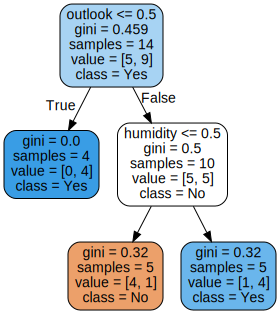

In [9]:
import pandas as pd
import numpy as np
from math import log2
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import graphviz
from IPython.display import SVG
from graphviz import Source
from sklearn import tree

# Load the PlayTennis dataset
data = pd.read_csv("play (1).csv")

# Label encoding for string columns
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

def entropy(class_col):
    """Function to calculate entropy of a given column"""
    values, counts = np.unique(class_col, return_counts=True)
    probs = counts / len(class_col)
    entropy = sum([-p*np.log2(p) for p in probs])
    return entropy

def info_gain(data, split_attribute_name, target_attribute_name, trace=0):
    """Function to calculate information gain of a given attribute"""
    
    total_entropy = entropy(data[target_attribute_name])
    
    vals, counts = np.unique(data[split_attribute_name], return_counts=True)
    

    weighted_entropy = sum([(counts[i]/sum(counts))*
                            entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_attribute_name])
                            for i in range(len(vals))])
    

    info_gain = total_entropy - weighted_entropy
    
    if trace:
        print("Information gain of {}: {:.4f}".format(split_attribute_name, info_gain))
    
    return info_gain


for col in data.columns[:-1]:
    info_gain(data, col, "play", trace=1)


X_train = data.drop(['play','day'], axis=1)
y_train = data['play']
print(X_train)
print(y_train)
test_sample = [[1, 0, 1, 1]]  # Rain, Cool, High, Weak

# Train the decision tree classifier
dtc = DecisionTreeClassifier(max_depth=2, random_state=42)
dtc.fit(X_train, y_train)

# Classify the test sample
y_pred = dtc.predict(test_sample)

# Print the predicted class of the test sample
print("Predicted class: {}".format(y_pred[0]))

# Print the decision tree with max depth 2
dot_data = tree.export_graphviz(dtc, out_file=None, feature_names=X_train.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
graph = graphviz.Source(dot_data)
SVG(graph.pipe(format='svg'))

2. Predict heart disease


a.	Apply decision tree classifier on heart disease dataset and report the accuracy.

b.	Try to change the following hyperparameters of the decision tree model and report the change in the accuracy

                    i.	Splitting Criterion from entropy to gini
                    ii.	max_depth 
                    iii.	min_samples_leaf


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pandas as pd

# Load data
df = pd.read_csv('heart.csv')

# Separate X (features) and y (target)
X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values
imputer = SimpleImputer()
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")




clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

clf = DecisionTreeClassifier(min_samples_leaf=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7346698113207547
Accuracy: 0.7712264150943396
Accuracy: 0.8466981132075472
Accuracy: 0.8254716981132075


In [12]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create initial decision tree model
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

# Measure accuracy of initial model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Initial Model Accuracy: {accuracy:.2f}")

# Change splitting criterion from entropy to gini
model = DecisionTreeClassifier(criterion='gini', random_state=42)
model.fit(X_train, y_train)

# Measure accuracy of model with gini criterion
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Gini Criterion Model Accuracy: {accuracy:.2f}")

# Change max depth of decision tree
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Measure accuracy of model with limited max depth
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Max Depth 3 Model Accuracy: {accuracy:.2f}")

# Change min samples leaf of decision tree
model = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5, random_state=42)
model.fit(X_train, y_train)

# Measure accuracy of model with minimum samples per leaf
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Min Samples Leaf 5 Model Accuracy: {accuracy:.2f}")

Initial Model Accuracy: 1.00
Gini Criterion Model Accuracy: 1.00
Max Depth 3 Model Accuracy: 1.00
Min Samples Leaf 5 Model Accuracy: 1.00


In [3]:
import numpy as np
import pandas as pd
from math import log2

df = pd.read_csv('play (1).csv')

def entropy(values):
    freq = {}
    for val in values:
        if val in freq:
            freq[val] += 1
        else:
            freq[val] = 1
    entropy = 0
    total = len(values)
    for val, count in freq.items():
        p = count/total
        entropy -= p*log2(p)
    return entropy

target_entropy = entropy(df['play'])

info_gains = {}
for col in df.columns[:-1]:
    values = df[col].unique()
    subsets = []
    for val in values:
        subsets.append(df[df[col] == val]['play'])
    subset_entropies = [entropy(subset) for subset in subsets]
    weights = [len(subset)/len(df) for subset in subsets]
    info_gain = target_entropy - sum([w*subset_entropy for w, subset_entropy in zip(weights, subset_entropies)])
    info_gains[col] = info_gain

print("Information Gains:")
for col, ig in info_gains.items():
    print(col, ":", ig)



Information Gains:
day : 0.9402859586706311
outlook : 0.24674981977443933
temp : 0.02922256565895487
humidity : 0.15183550136234159
wind : 0.04812703040826949
